## **i. Brief Project**

**Judul**   : Analisis Tren Attrition Karyawan dan Faktor Penyebabnya  
**Dataset** : IBM HR Analytics Employee Attrition & Performance (https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/data)  
**Tools**   : Python (Pandas, Matplotlib, Seaborn), Tableau  

## **ii. Problem Statement**

- Tingkat attrition perusahaan cukup tinggi dan belum dipahami penyebab utamanya.
- Belum diketahui pola attrition berdasarkan jabatan, departemen, usia, dan masa kerja.
- Perusahaan belum dapat mengidentifikasi kelompok karyawan yang paling berisiko resign.
- Pengaruh faktor internal seperti gaji, overtime, dan kepuasan kerja terhadap attrition masih belum jelas.
- Tanpa analisis ini, perusahaan kesulitan menyusun strategi retensi yang tepat.

## **iii. Background & Bussiness Context**

Kenapa masalah ini penting untuk bisnis?
- Attrition tinggi meningkatkan biaya rekrutmen dan pelatihan karyawan baru.
- Kehilangan karyawan berpengalaman menurunkan produktivitas tim.
- Pergantian karyawan mengganggu stabilitas operasional dan alur kerja.
- Kualitas layanan atau output kerja bisa menurun karena adaptasi karyawan baru.

Apa dampaknya terhadap revenue/operasi/customer?
- Biaya pergantian karyawan dapat mencapai 30–200% dari gaji tahunan tiap karyawan.
- Target departemen dapat tertunda karena kekurangan tenaga kerja kompeten.
- Penurunan kualitas kinerja dapat berdampak pada kepuasan pelanggan.
- Overload pada karyawan yang tersisa meningkatkan risiko burnout dan attrition lanjutan.

## **iv. Data Understanding & Process**

Berikut merupakan penjelasan kategori dalam beberapa kolom penting:  

**Kolom Education**  
1 = 'Below College'  
2 = 'College'  
3 = 'Bachelor'  
4 = 'Master'  
5 = 'Doctor'  

**Kolom EnvironmentSatisfaction**  
1 = 'Low'  
2 = 'Medium'  
3 = 'High'  
4 = 'Very High'  

**Kolom JobInvolvement**  
1 = 'Low'  
2 = 'Medium'  
3 = 'High'  
4 = 'Very High'  

**Kolom JobSatisfaction**  
1 = 'Low'  
2 = 'Medium'  
3 = 'High'  
4 = 'Very High'  

**Kolom PerformanceRating**  
1 = 'Low'  
2 = 'Good'  
3 = 'Excellent'  
4 = 'Outstanding'  

**Kolom RelationshipSatisfaction**  
1 = 'Low'  
2 = 'Medium'  
3 = 'High'  
4 = 'Very High'  

**Kolom WorkLifeBalance**  
1 = 'Bad'  
2 = 'Good'  
3 = 'Better'  
4 = 'Best'

In [5]:
# Import library yang dibutuhkan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [6]:
# Untuk membaca file csv
df = pd.read_csv("employee.csv")
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
# Untuk melihat informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Dari informasi diatas dapat diketahui bahwa dataset berisi 1470 baris dan 35 kolom data, kemudian juga tidak terdapat missing value sehingga tidak perlu dilakukan cleaning data.

## **v. Exploratory Data Analysis & Bussiness Insight**

### **1. Bagaimana pola Attrition Rate berdasarkan Department, Tenure, dan Age?**

Setiap departemen punya beban dan tekanan kerja yang berbeda, sehingga tingkat karyawan keluar (attrition) juga bisa berbeda. Selain itu, masa kerja dan usia berpengaruh karena karyawan baru dan karyawan muda biasanya lebih mudah pindah pekerjaan. Dengan menganalisis ketiga faktor ini, perusahaan bisa tahu kelompok mana yang paling berisiko keluar dan butuh perhatian lebih.

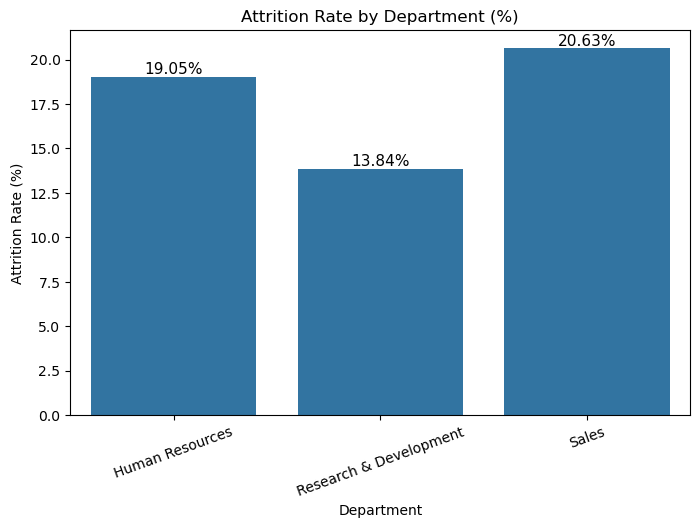

In [8]:
# Konversi Yes/No ke 1/0
df['Attrition_New'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Hitung attrition rate
dept_attrition = (
    df.groupby('Department')['Attrition_New']
    .mean()
    .reset_index()
)

# Ubah ke persen
dept_attrition['AttritionRate'] = dept_attrition['Attrition_New'] * 100

# Plot grafik
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=dept_attrition, x='Department', y='AttritionRate')

# Tambahkan angka persen di atas bar
for p in ax.patches:
    value = p.get_height()
    ax.annotate(f"{value:.2f}%", 
                (p.get_x() + p.get_width() / 2., value),
                ha='center', va='bottom',
                fontsize=11)

plt.title("Attrition Rate by Department (%)")
plt.ylabel("Attrition Rate (%)")
plt.xticks(rotation=20)
plt.show()

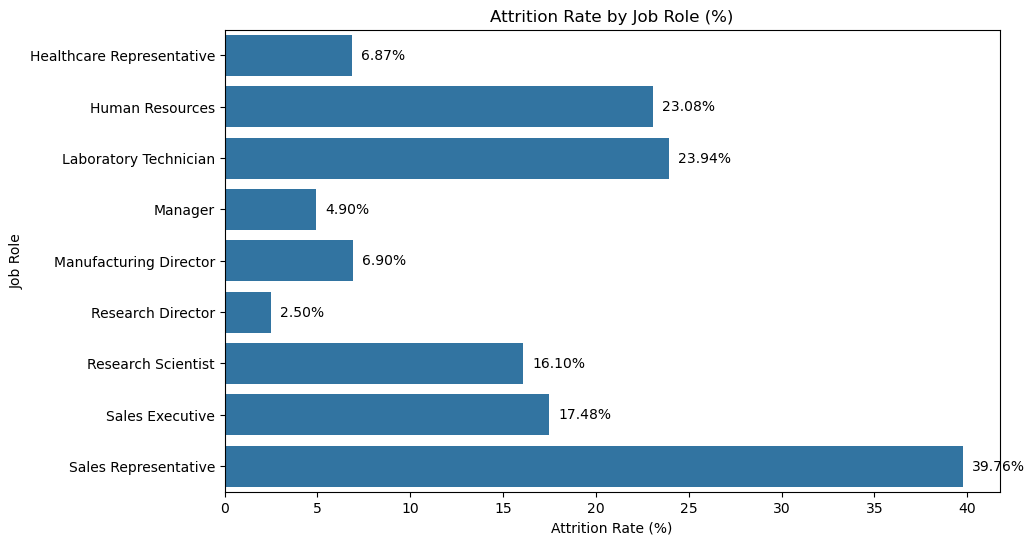

In [9]:
# Hitung attrition rate per JobRole (masih proporsi)
jobrole_attrition = (
    df.groupby('JobRole')['Attrition_New']
    .mean()
    .reset_index()
    .rename(columns={'Attrition_New': 'AttritionRate'})
)

# Ubah menjadi persen
jobrole_attrition['AttritionRate'] = jobrole_attrition['AttritionRate'] * 100

# Plot grafik horizontal
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=jobrole_attrition, x='AttritionRate', y='JobRole')

# Tambahkan label angka persen di samping bar
for p in ax.patches:
    value = p.get_width()  # karena horizontal bar
    ax.annotate(f"{value:.2f}%", 
                (value + 0.5, p.get_y() + p.get_height() / 2),  # posisi label
                va='center',
                fontsize=10)

plt.title("Attrition Rate by Job Role (%)")
plt.xlabel("Attrition Rate (%)")
plt.ylabel("Job Role")
plt.show()

/var/folders/6m/jq9rtsnx7m74rk2b3hzjpmd80000gn/T/ipykernel_54390/2043223020.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('AgeGroup')['Attrition_New']


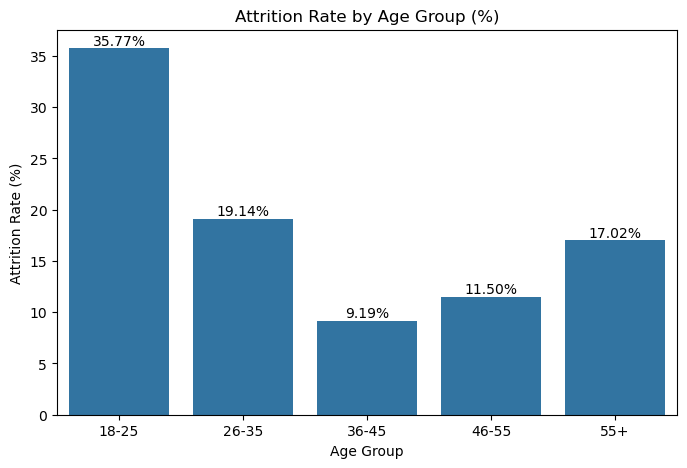

In [10]:
# Membuat kelompok usia
bins = [18, 25, 35, 45, 55, 70]
labels = ["18-25", "26-35", "36-45", "46-55", "55+"]

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

# Hitung attrition rate per Age Group
age_attrition = (
    df.groupby('AgeGroup')['Attrition_New']
    .mean()
    .reset_index()
    .rename(columns={'Attrition_New': 'AttritionRate'})
)

# Konversi ke persen
age_attrition['AttritionRate'] = age_attrition['AttritionRate'] * 100

# Plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=age_attrition, x='AgeGroup', y='AttritionRate')

# Tambahkan label persen
for p in ax.patches:
    value = p.get_height()
    ax.annotate(f"{value:.2f}%",
                (p.get_x() + p.get_width() / 2., value),
                ha='center', va='bottom',
                fontsize=10)

plt.title("Attrition Rate by Age Group (%)")
plt.ylabel("Attrition Rate (%)")
plt.xlabel("Age Group")
plt.show()

### **Interpretasi**

Berdasarkan hasil analisis, pola attrition menunjukkan bahwa attrition tertinggi terjadi pada Department Sales, terutama pada job role Sales Representative, yang memiliki tingkat keluar mencapai hampir 40%. Dari sisi usia, kelompok usia muda (18–25 tahun) memiliki attrition paling tinggi, menandakan bahwa karyawan baru atau awal karier lebih mudah berpindah pekerjaan. Sementara itu, usia 36–45 memiliki attrition paling rendah, yang menggambarkan fase karier yang lebih stabil. Secara keseluruhan, pola attrition terjadi terutama pada departemen dengan tekanan kerja tinggi dan kelompok karyawan usia muda, sedangkan departemen teknis dan kelompok usia pertengahan memiliki attrition lebih rendah.

### **2. Apakah gaji pegawai berpengaruh terhadap attrition rate?**

Gaji adalah alasan umum kenapa karyawan bertahan atau memilih keluar. Karyawan dengan gaji lebih rendah bisa saja merasa kurang sejahtera atau tidak dihargai, sehingga lebih mudah mencari pekerjaan lain. Analisis ini membantu mengetahui apakah tingkat gaji menjadi pemicu utama karyawan resign dan apakah struktur gaji perusahaan sudah adil dan kompetitif.

In [11]:
income_summary = df.groupby('Attrition')['MonthlyIncome'].describe()
print(income_summary)

            count         mean          std     min     25%     50%     75%  \
Attrition                                                                     
No         1233.0  6832.739659  4818.208001  1051.0  3211.0  5204.0  8834.0   
Yes         237.0  4787.092827  3640.210367  1009.0  2373.0  3202.0  5916.0   

               max  
Attrition           
No         19999.0  
Yes        19859.0  


Berdasarkan tabel deskriptif:
- Rata-rata gaji karyawan yang bertahan adalah $6.833, sedangkan karyawan yang resign hanya $4.787.
- Median gaji: bertahan $5.204 vs resign $3.202.
- Kuartil bawah/atas menunjukkan karyawan yang resign umumnya memiliki gaji lebih rendah, meskipun nilai maksimum hampir sama.

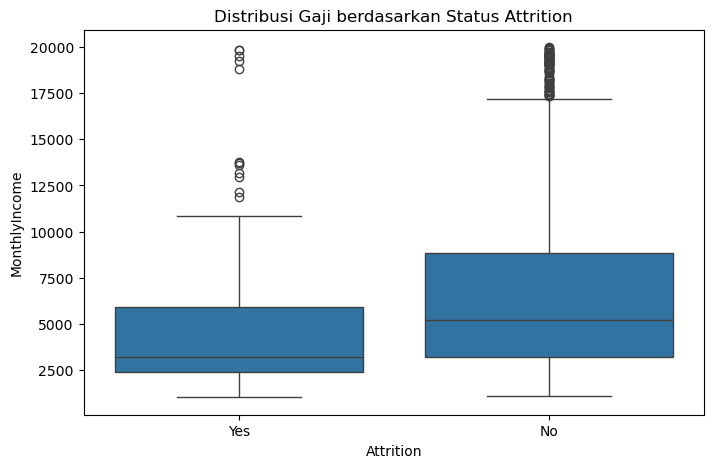

In [12]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Distribusi Gaji berdasarkan Status Attrition")
plt.show()

### Interpretasi

Karyawan dengan gaji lebih rendah cenderung lebih sering meninggalkan perusahaan, sementara gaji lebih tinggi tampaknya berkontribusi pada retensi. Hal ini menunjukkan bahwa gaji merupakan faktor yang berpengaruh terhadap attrition rate.

### **3. Bagaimana hubungan antara attrition dengan department, jobrole, overtime,  education field, dan marital status?**

Faktor-faktor seperti jenis pekerjaan, jumlah lembur, latar pendidikan, dan status pernikahan dapat memengaruhi keputusan karyawan untuk keluar. Misalnya job role tertentu lebih berat, lembur berlebihan menyebabkan lelah, atau pekerjaan tidak sesuai pendidikan membuat karyawan kurang nyaman. Dengan melihat hubungan ini, perusahaan bisa memahami penyebab attrition dari berbagai sisi pekerjaan dan kehidupan pribadi karyawan.

In [13]:
categorical_cols = ['Department', 'JobRole', 'OverTime', 'EducationField', 'MaritalStatus']

for col in categorical_cols:
    contingency = pd.crosstab(df[col], df['Attrition'])
    chi2, p, dof, _ = chi2_contingency(contingency)
    print(f"{col}: p-value = {p:.4f}")
    if p < 0.05:
        print(f"-> {col} berhubungan signifikan dengan attrition\n")
    else:
        print(f"-> {col} TIDAK berhubungan signifikan dengan attrition\n")

Department: p-value = 0.0045
-> Department berhubungan signifikan dengan attrition

JobRole: p-value = 0.0000
-> JobRole berhubungan signifikan dengan attrition

OverTime: p-value = 0.0000
-> OverTime berhubungan signifikan dengan attrition

EducationField: p-value = 0.0068
-> EducationField berhubungan signifikan dengan attrition

MaritalStatus: p-value = 0.0000
-> MaritalStatus berhubungan signifikan dengan attrition



### Interpretasi

Hasil analisis menunjukkan bahwa semua faktor kategori yang diuji memiliki pengaruh terhadap karyawan yang keluar. Departemen dan posisi pekerjaan memengaruhi tingkat keluar, dengan beberapa departemen atau jabatan tertentu lebih rentan kehilangan karyawan. Karyawan yang sering lembur cenderung lebih mungkin resign, begitu pula karyawan dengan latar belakang pendidikan tertentu. Status perkawinan juga berperan, di mana karyawan yang belum menikah atau baru menikah memiliki risiko keluar lebih tinggi. Secara keseluruhan, departemen, jabatan, lembur, pendidikan, dan status perkawinan merupakan faktor penting yang memengaruhi kemungkinan karyawan meninggalkan perusahaan.

### **4. Seberapa besar pengaruh kepuasan kerja yang mencakup kenyamanan lingkungan kerja, kepuasan terhadap pekerjaan, dan tingkat keterlibatan karyawan dalam pekerjaannya terhadap kemungkinan mereka untuk keluar dari perusahaan?**

Karyawan yang tidak puas dengan lingkungan kerja, tugas yang dikerjakan, atau tidak merasa terlibat dalam pekerjaan cenderung lebih mudah resign. Tingkat kepuasan kerja ini sangat memengaruhi kenyamanan dan komitmen mereka. Analisis ini membantu perusahaan mengetahui aspek mana yang harus ditingkatkan agar karyawan lebih betah dan tidak mudah keluar.


=== Chi-Square Results ===
         Factor   p_value
0  EnvSat_Label  0.000051
1  JobSat_Label  0.000556
2  JobInv_Label  0.000003


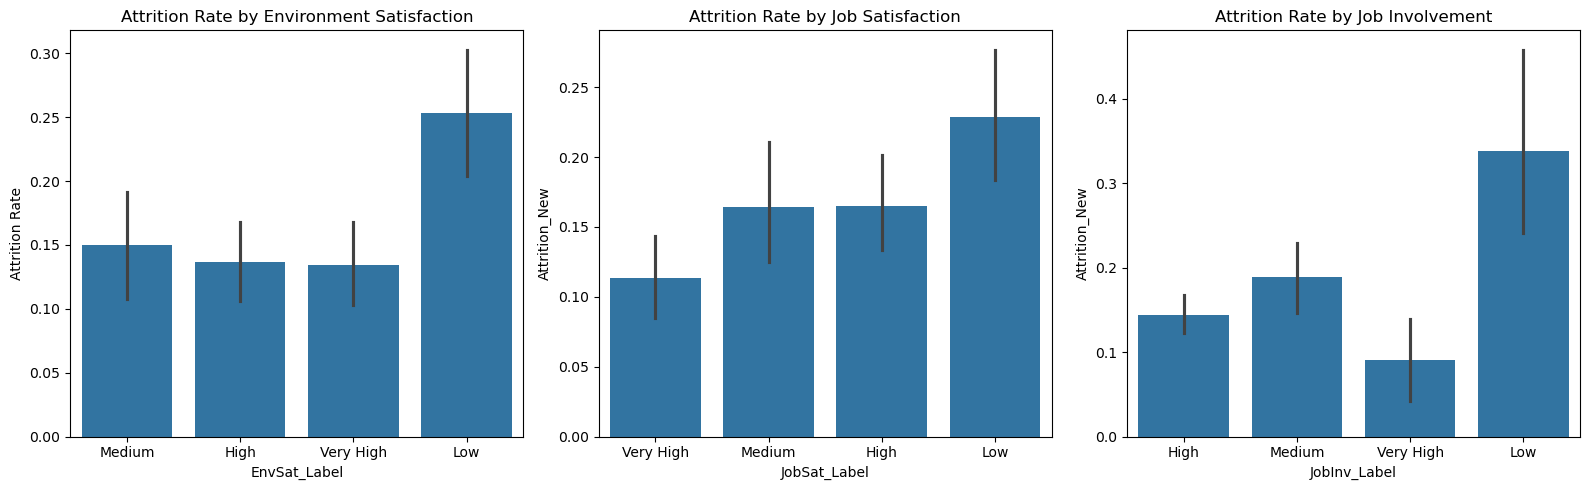


=== Attrition Rate (%) by Environment Satisfaction ===
EnvSat_Label
High         13.686534
Low          25.352113
Medium       14.982578
Very High    13.452915
Name: Attrition_New, dtype: float64

=== Attrition Rate (%) by Job Satisfaction ===
JobSat_Label
High         16.515837
Low          22.837370
Medium       16.428571
Very High    11.328976
Name: Attrition_New, dtype: float64

=== Attrition Rate (%) by Job Involvement ===
JobInv_Label
High         14.400922
Low          33.734940
Medium       18.933333
Very High     9.027778
Name: Attrition_New, dtype: float64


In [14]:
# 1. Copy dataset dan encode attrition
df2 = df.copy()
df2["Attrition_New"] = df2["Attrition"].map({"Yes": 1, "No": 0})

# 2. Mapping kategori 1–4 → Low–Very High
mapping = {
    1: "Low",
    2: "Medium",
    3: "High",
    4: "Very High"
}

df2["EnvSat_Label"] = df2["EnvironmentSatisfaction"].map(mapping)
df2["JobSat_Label"] = df2["JobSatisfaction"].map(mapping)
df2["JobInv_Label"] = df2["JobInvolvement"].map(mapping)

# 3. Chi-Square Test untuk 3 variabel
cols = ["EnvSat_Label", "JobSat_Label", "JobInv_Label"]
chi_results = []

for col in cols:
    table = pd.crosstab(df2[col], df2["Attrition_New"])
    chi2, p, dof, expected = chi2_contingency(table)
    chi_results.append([col, p])

chi_df = pd.DataFrame(chi_results, columns=["Factor", "p_value"])
print("\n=== Chi-Square Results ===")
print(chi_df)

# 4. Grafik Attrition Rate per tingkat kepuasan
plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
sns.barplot(data=df2, x="EnvSat_Label", y="Attrition_New")
plt.title("Attrition Rate by Environment Satisfaction")
plt.ylabel("Attrition Rate")

plt.subplot(1,3,2)
sns.barplot(data=df2, x="JobSat_Label", y="Attrition_New")
plt.title("Attrition Rate by Job Satisfaction")

plt.subplot(1,3,3)
sns.barplot(data=df2, x="JobInv_Label", y="Attrition_New")
plt.title("Attrition Rate by Job Involvement")

plt.tight_layout()
plt.show()

# 5. Ringkasan angka attrition untuk tiap kategori
summary_env = df2.groupby("EnvSat_Label")["Attrition_New"].mean() * 100
summary_job = df2.groupby("JobSat_Label")["Attrition_New"].mean() * 100
summary_inv = df2.groupby("JobInv_Label")["Attrition_New"].mean() * 100

print("\n=== Attrition Rate (%) by Environment Satisfaction ===")
print(summary_env)

print("\n=== Attrition Rate (%) by Job Satisfaction ===")
print(summary_job)

print("\n=== Attrition Rate (%) by Job Involvement ===")
print(summary_inv)

### Interpretasi

Hasil analisis menunjukkan bahwa tiga faktor—Environment Satisfaction, Job Satisfaction, dan Job Involvement—memiliki pengaruh signifikan terhadap kemungkinan karyawan untuk keluar dari perusahaan. Karyawan dengan tingkat kepuasan lingkungan kerja rendah memiliki angka attrition tertinggi (25%), jauh lebih tinggi dibandingkan mereka yang merasa puas atau sangat puas. Pola serupa juga terlihat pada job satisfaction, di mana karyawan yang merasa tidak puas memiliki peluang resign lebih tinggi (22%) dibandingkan yang sangat puas (11%). Faktor paling menonjol adalah job involvement, karena karyawan dengan tingkat keterlibatan kerja rendah memiliki risiko keluar yang sangat tinggi (34%), sementara mereka yang sangat terlibat hanya sekitar 9%. Secara sederhana, semakin rendah kepuasan dan keterlibatan karyawan terhadap pekerjaannya dan lingkungannya, semakin besar kemungkinan mereka untuk meninggalkan perusahaan.

## **vi. Conclusion**

Attrition paling tinggi terjadi pada Department Sales, khususnya Sales Representative, serta pada karyawan usia muda (18–25 tahun) yang cenderung kurang stabil di awal karier. Karyawan dengan gaji rendah dan beban lembur tinggi juga lebih berisiko resign. Selain itu, kepuasan lingkungan kerja, kepuasan kerja, dan keterlibatan kerja terbukti sangat berpengaruh—karyawan dengan tingkat kepuasan atau keterlibatan rendah memiliki peluang keluar jauh lebih besar.

## **vii. Recommendation and Action Plan**

**1. Fokus pada Sales & Posisi Risiko Tinggi**
- Perbaiki beban kerja dan proses kerja Sales Representative.
- Berikan coaching dan dukungan tambahan untuk role penting.

**2. Perkuat Retensi Usia Muda**
- Tingkatkan onboarding, mentorship, dan jalur pengembangan awal karier.

**3. Tingkatkan Kompensasi Segmen Gaji Rendah**
- Lakukan penyesuaian gaji atau berikan tunjangan tambahan.

**4. Kurangi Lembur & Perbaiki Work-Life Balance**
- Atur ulang beban kerja, tambah tenaga jika diperlukan.

**5. Tingkatkan Kepuasan & Keterlibatan Karyawan**
- Lakukan survei rutin dan pelatihan manajer untuk meningkatkan engagement.
- Implementasikan program penghargaan karyawan.

## **viii. Bussiness Impact**

- Turnover berkurang 10–20% sehingga operasi lebih stabil.
- Efisiensi biaya rekrutmen dan training, mengurangi beban biaya tahunan.
- Produktivitas meningkat karena karyawan bertahan lebih lama.
- Sales lebih stabil, mengurangi hilangnya pendapatan akibat seringnya pergantian staf.